<a href="https://colab.research.google.com/github/willdickerson/Python-2.7.3/blob/master/intro_to_neural_nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Neural Networks: Training and Deploying an Image Classifier

*Adapted from the Fastai course notes written by Francisco Ingham and Jeremy Howard with inspiration from [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

Before you start using your notebook, you need to install the necessary packages.

In [0]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


To save files, you need to permit your Colaboratory instance to read and write files to your Google Drive.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'intro_to_neural_nets/'

Mounted at /content/gdrive


In [0]:
from fastai.vision import *

## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ads block add-ons (YouBlock) in Chrome. Otherwise window.open() coomand doesn't work. Then you can run the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload urls file into your server

Choose an appropriate name for your labeled images. You can run these steps multiple times to create different labels.

In [0]:
folder = 'american_elm'
file = 'urls_american_elm.csv'

In [0]:
folder = 'american_sycamore'
file = 'urls_american_sycamore.csv'

In [0]:
folder = 'bald_cypress'
file = 'urls_bald_cypress.csv'

In [0]:
folder = 'bigtooth_maple'
file = 'urls_bigtooth_maple.csv'

In [0]:
folder = 'black_cherry'
file = 'urls_black_cherry.csv'

In [0]:
folder = 'cedar_elm'
file = 'urls_cedar_elm.csv'

In [0]:
folder = 'green_ash'
file = 'urls_green_ash.csv'

In [0]:
folder = 'live_oak'
file = 'urls_live_oak.csv'

In [0]:
folder = 'magnolia'
file = 'urls_magnolia.csv'

In [0]:
folder = 'mexican_white_oak'
file = 'urls_mexican_white_oak.csv'

In [0]:
folder = 'pecan'
file = 'urls_pecan.csv'

In [0]:
folder = 'red_oak'
file = 'urls_red_oak.csv'

In [0]:
folder = 'shumard_oak'
file = 'urls_shumard_oak.csv'

In [0]:
folder = 'texas_ash'
file = 'urls_texas_ash.csv'

In [0]:
folder = 'texas_walnut'
file = 'urls_texas_walnut.csv'

In [0]:
folder = 'yaupon'
file = 'urls_yaupon.csv'

You will need to run this cell once per each category.

In [0]:
path = Path(base_dir + 'data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('/content/gdrive/My Drive/intro_to_neural_nets/data/american_elm'),
 PosixPath('/content/gdrive/My Drive/intro_to_neural_nets/data/urls_shumard_oak.csv'),
 PosixPath('/content/gdrive/My Drive/intro_to_neural_nets/data/urls_texas_ash.csv'),
 PosixPath('/content/gdrive/My Drive/intro_to_neural_nets/data/urls_texas_walnut.csv'),
 PosixPath('/content/gdrive/My Drive/intro_to_neural_nets/data/urls_yaupon.csv'),
 PosixPath('/content/gdrive/My Drive/intro_to_neural_nets/data/urls_pecan.csv'),
 PosixPath('/content/gdrive/My Drive/intro_to_neural_nets/data/urls_red_oak.csv'),
 PosixPath('/content/gdrive/My Drive/intro_to_neural_nets/data/urls_magnolia.csv'),
 PosixPath('/content/gdrive/My Drive/intro_to_neural_nets/data/urls_mexican_white_oak.csv'),
 PosixPath('/content/gdrive/My Drive/intro_to_neural_nets/data/urls_cedar_elm.csv'),
 PosixPath('/content/gdrive/My Drive/intro_to_neural_nets/data/urls_live_oak.csv'),
 PosixPath('/content/gdrive/My Drive/intro_to_neural_nets/data/urls_b

## Download images

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [0]:
classes = ['american_elm','american_sycamore','bald_cypress', 'bigtooth_maple', 'black_cherry', 'cedar_elm', 'green_ash', 'live_oak', 'magnolia', 'mexican_white_oak', 'pecan', 'red_oak', 'shumard_oak', 'texas_ash', 'texas_walnut', 'yaupon']

In [0]:
download_images(path/file, dest, max_pics=200)

Then we can remove any images that can't be opened:

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

## View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [0]:
data.classes

['american_elm',
 'american_sycamore',
 'bald_cypress',
 'bigtooth_maple',
 'black_cherry',
 'cedar_elm',
 'green_ash',
 'live_oak',
 'magnolia',
 'mexican_white_oak',
 'pecan',
 'red_oak',
 'shumard_oak',
 'texas_ash',
 'texas_walnut',
 'yaupon']

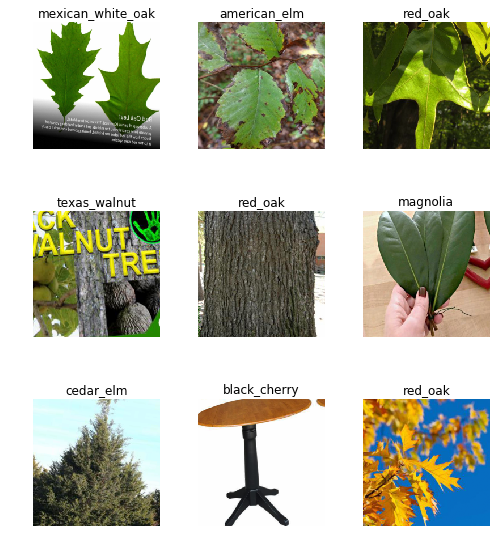

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['american_elm',
  'american_sycamore',
  'bald_cypress',
  'bigtooth_maple',
  'black_cherry',
  'cedar_elm',
  'green_ash',
  'live_oak',
  'magnolia',
  'mexican_white_oak',
  'pecan',
  'red_oak',
  'shumard_oak',
  'texas_ash',
  'texas_walnut',
  'yaupon'],
 16,
 2328,
 581)

## Train model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.795848,1.966923,0.600688,00:37
1,2.219246,1.732698,0.530120,00:37
2,1.880522,1.650861,0.538726,00:38
3,1.624917,1.649166,0.528399,00:37


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


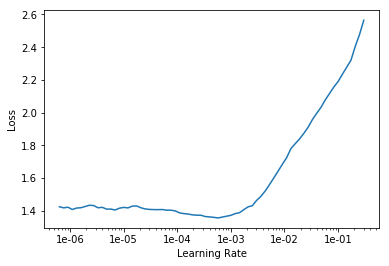

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,1.422676,1.643186,0.531842,00:36
1,1.396837,1.637532,0.523236,00:37


In [0]:
learn.save('stage-2')

## Interpretation

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

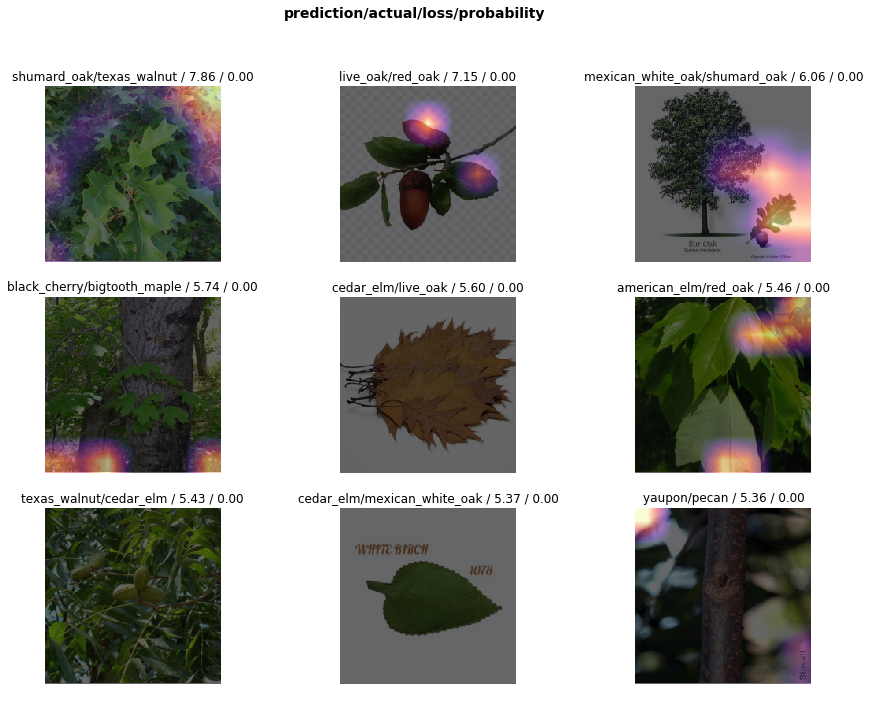

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

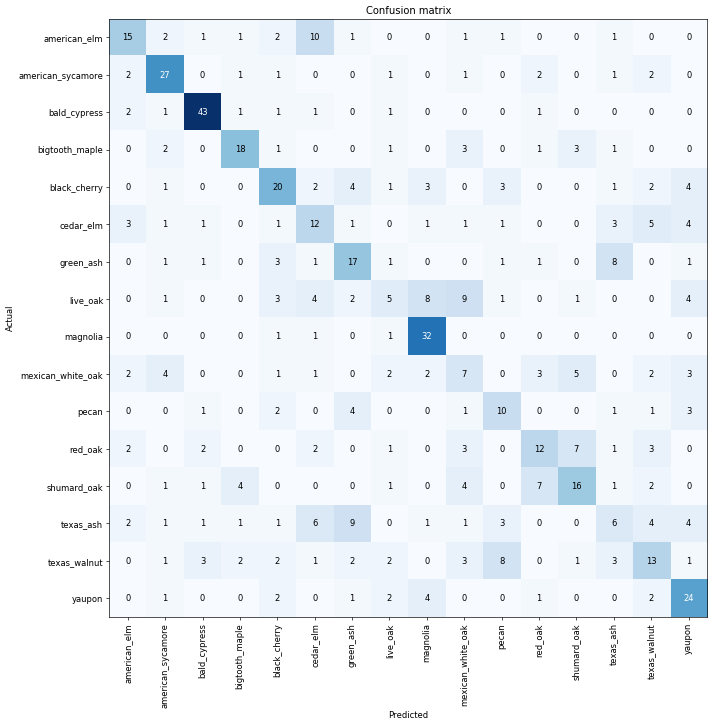

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

## Putting your model in production

First thing first, let's export the content of our `Learner` object for production:

In [0]:
learn.export()

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

Note the download link should start the file download directly—and is typically different from the share link (which presents you with a view to download the file).

Use this link generator: https://www.wonderplugin.com/online-tools/google-drive-direct-link-generator/